{'10': 246, '00': 250, '11': 258, '01': 270}
     ┌───┐┌─┐   
q_0: ┤ H ├┤M├───
     ├───┤└╥┘┌─┐
q_1: ┤ H ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 


C:\Users\a1333\AppData\Local\Temp\ipykernel_29996\1821733428.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  qc.draw(output='mpl').show()


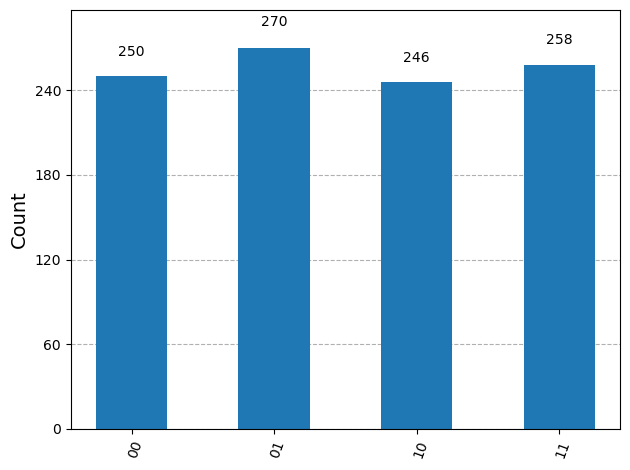

In [1]:
import qiskit as qk
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
# Create a quantum circuit with two qubits and two classical bits
qc = qk.QuantumCircuit(2, 2)

# Apply Hadamard gate to both qubits
qc.h(0)
qc.h(1)

# Measure both qubits
qc.measure(0, 0)
qc.measure(1, 1)

# Choose the qasm_simulator backend
simulator = AerSimulator(method='statevector')

# Simulate the circuit
job = simulator.run(qc, shots=1024)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts(qc))

# Visualize the circuit
print(qc)
qc.draw(output='mpl').show()

# Visualize the measurement outcomes
plot_histogram(result.get_counts(qc))

      ┌───┐     ┌─┐   
   a: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
   b: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
ac: 1/═══════════╩══╬═
                 0  ║ 
bc: 1/══════════════╩═
                    0 
{'0 0': 5058, '1 1': 4942}
      ┌───┐     ┌─┐   
   a: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
   b: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
ac: 1/═══════════╩══╬═
                 0  ║ 
bc: 1/══════════════╩═
                    0 


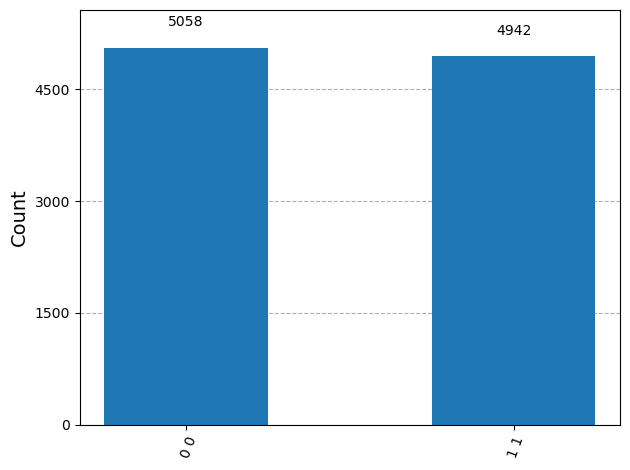

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import math
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
## Uncomment the next line to see diagrams when running in a notebook
#%matplotlib inline

## Example 3-2: Entangled Qubits
# Set up the program
a = QuantumRegister(1, name='a')
b = QuantumRegister(1, name='b')
a_c = ClassicalRegister(1, name='ac')
b_c = ClassicalRegister(1, name='bc')
qc = QuantumCircuit(a, b, a_c, b_c)

qc.h(a)              # put a into a superposition of 0 and 1
qc.cx(a, b)        # entangle a and b
qc.measure(a, a_c)
qc.measure(b, b_c)

print(qc)

# Choose the qasm_simulator backend
simulator = AerSimulator(method='statevector')

# Simulate the circuit
job = simulator.run(qc, shots=10000)

# Get the result
result = job.result()

# Print the counts
print(result.get_counts(qc))

# Visualize the circuit
print(qc)
#qc.draw(output='mpl').show()

# Visualize the measurement outcomes
plot_histogram(result.get_counts(qc))